In [1]:
import os
import json
import matplotlib.pyplot as plt

Configure paths

In [2]:
project_path = '../../../thingsboard'
current_path_from_project_path = '../RIMEL-Docker-3/scripts/release_scripts'
project_env_files_path = './docker'
script_tag_path = '../script_tag.sh'
tags_path = './tags.json'

Count the number of EV variables

In [3]:
# Counts the number of environment variables in a directory 
# Suggesting that all EV are stored in .env files

In [4]:
def is_EV(line):
    if line[0] == '#' or not line.strip():
        return False
    else:
        return True

In [5]:
def get_EV_declaration_files():
    files = []
    for r, d, f in os.walk('.'):
        for file in f:
            if '.env' in file:
                files.append(os.path.join(r, file))
    return files  

In [6]:
def count_EV(files_paths):
    nb_EV = 0
    for file_path in files_paths:
        file = open(file_path, 'r')
        for line in file:
            if is_EV(line):
                nb_EV += 1
    return nb_EV

In [7]:
def get_nb_of_EV():
    files = get_EV_declaration_files()
    return count_EV(files)

Count the nb of EV in a directory

In [8]:
def count(directory):
    releases = []
    nbEV = []
    
    f = open(tags_path, 'r')
    logs_json = json.load(f)
    
    %cd $project_path
    
    for release in logs_json:
        commit = logs_json[release]
        !git checkout $commit
        
        releases.append(release)
        nbEV.append(get_nb_of_EV())
        
    !git checkout master
    %cd $current_path_from_project_path
    return releases, nbEV

Run script

In [9]:
#Generating tags.json
os.system(script_tag_path + ' ' + project_path)

32512

In [10]:
%%capture
releases, nbEV = count(project_env_files_path)

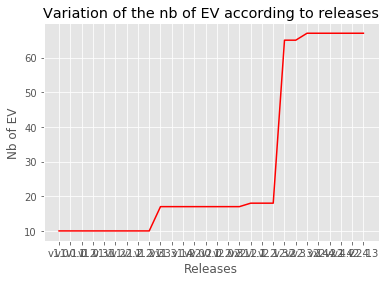

<Figure size 1440x1440 with 0 Axes>

In [18]:
plt.style.use('ggplot')
plt.plot(releases, nbEV, color='red')
plt.title("Variation of the nb of EV according to releases")
plt.xlabel("Releases")
plt.ylabel("Nb of EV")

plt.show()